# Predict unseen data 

In [1]:
import os
import numpy as np
import pandas as pd
import sys
import joblib
sys.path.append('..')
from general_utils.helper import get_config
from preprocess import load_data

In [2]:
conf = get_config()
class_names = conf['common_cols']['class_names'].split(',')
model_dir = conf['model_path']['out_model_dir']
cls_names = [class_names[1],class_names[0]]  # label 0: benign, 1: LU
# class_names[1] = benign

In [3]:
# load unseen test data
x, y, feat_name = load_data('pred_data')


In [4]:
def get_data_model(model_type, x):
    # transform using split trained scaler
    if model_type == 'split_train':
        conf_scaler_section = 'model_split_scaler_file'
        conf_sel_feat_section = 'model_split_select_feature_results'
        conf_model_section = 'model_split_model_dump_file'
    else:
        conf_scaler_section = 'model_whole_scaler_file'
        conf_sel_feat_section = 'model_whole_select_feature_results'
        conf_model_section = 'model_whole_model_dump_file'
        
    scaler_fname = os.path.join(model_dir, conf['model_path'][conf_scaler_section])
    scaler = joblib.load(scaler_fname)
    x_s_test = scaler.transform(x)
    
    # load split feature selection
    sel_feat_fname = os.path.join(model_dir, conf['model_path'][conf_sel_feat_section])
    sel_feats_f = np.load(sel_feat_fname)
    raw_feats, sel_supp = sel_feats_f['original_feat'], sel_feats_f['supp']
    
    # load model
    model_fname = os.path.join(model_dir, conf['model_path'][conf_model_section])
    clf = joblib.load(model_fname)
    
    return x_s_test, raw_feats, sel_supp, clf

In [5]:
def plt_pred_result(clf, x_s_test_new, y, cls_names=cls_names):
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_roc_curve
    from sklearn.metrics import plot_precision_recall_curve
    from sklearn.metrics import plot_confusion_matrix
    
    # roc curve
    fig, ax = plt.subplots()
    clf_disp = plot_roc_curve(clf, x_s_test_new, y, name='Classifier', ax=ax)
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
    
    # PR curve
    fig, ax = plt.subplots()
    disp = plot_precision_recall_curve(clf, x_s_test_new, y, name='Classifier', ax=ax)
    
    # confusion matrix
    disp = plot_confusion_matrix(clf, x_s_test_new, y,
                                 display_labels=cls_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

# predicted by split-data trained model

In [6]:
x_s_test, raw_feats, sel_supp, clf = get_data_model('split_train', x)
x_s_test_new = x_s_test[:, sel_supp]

In [13]:
raw_feats[sel_supp]

array(['DBNDD1:NM_024043:chr16:90076529:cov',
       'GDA:NM_001242505:chr9:74764266:cov',
       'GRIN2A:NM_001134407:chr16:10276263:cov',
       'KCTD1:NM_001136205:chr18:24129399:cov',
       'KCTD1:NM_001142730:chr18:24128500:cov',
       'LINC00445:NR_132116:chr13:36271660:cov',
       'LOC729966:NR_036575:chr19:18366229:cov',
       'MIR3648-1:NR_037421:chr21:9825831:cov',
       'MIR3687-1:NR_037458:chr21:9826202:cov',
       'MIR5692A2:NR_049876:chr8:12576640:cov',
       'REXO1L2P:NR_003594:chr8:86803597:cov',
       'ZMYM4-AS1:NR_046659:chr1:35831678:cov', 'duprate',
       'mismatch_rate', 'error_rate'], dtype=object)

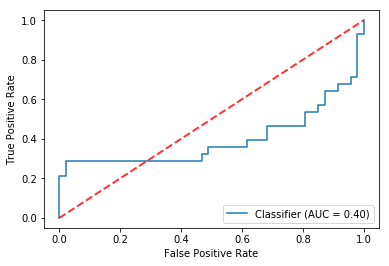

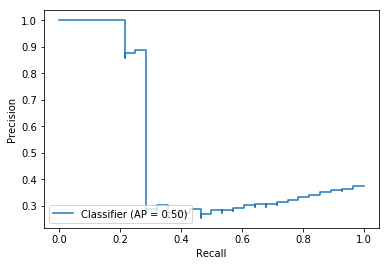

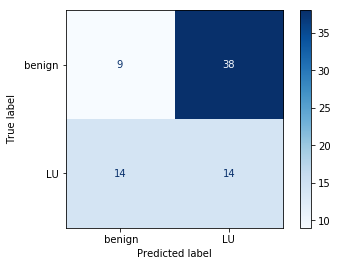

In [20]:
plt_pred_result(clf, x_s_test_new, y, cls_names=cls_names)

# predicted by whole-data trained model

In [ ]:
x_s_test, raw_feats, sel_supp, clf = get_data_model('whole-train', x)
x_s_test_new = x_s_test[:, sel_supp]

In [ ]:
raw_feats[sel_supp]

In [ ]:
plt_pred_result(clf, x_s_test_new, y, cls_names=cls_names)

In [9]:
x_s_test, raw_feats, sel_supp, clf = get_data_model('whole-train', x)
x_s_test_new = x_s_test[:, sel_supp]

In [12]:
raw_feats[sel_supp]

array(['DBNDD1:NM_024043:chr16:90076529:cov',
       'GDA:NM_001242505:chr9:74764266:cov',
       'GRIN2A:NM_001134407:chr16:10276263:cov',
       'KCTD1:NM_001136205:chr18:24129399:cov',
       'KCTD1:NM_001142730:chr18:24128500:cov',
       'LINC00445:NR_132116:chr13:36271660:cov',
       'LOC729966:NR_036575:chr19:18366229:cov',
       'MIR3648-1:NR_037421:chr21:9825831:cov',
       'MIR3687-1:NR_037458:chr21:9826202:cov',
       'MIR5692A2:NR_049876:chr8:12576640:cov',
       'REXO1L2P:NR_003594:chr8:86803597:cov',
       'ZMYM4-AS1:NR_046659:chr1:35831678:cov', 'duprate',
       'mismatch_rate', 'error_rate'], dtype=object)

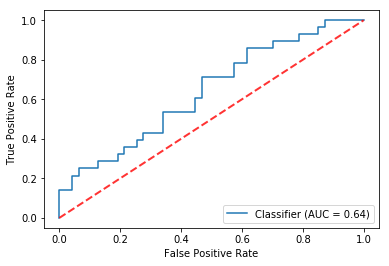

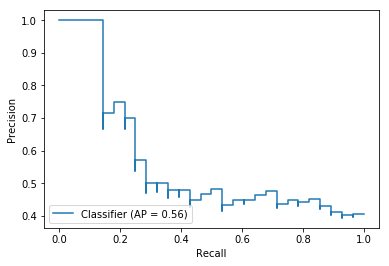

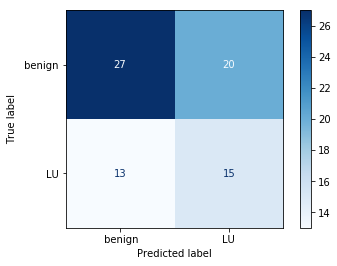

In [21]:
plt_pred_result(clf, x_s_test_new, y, cls_names=cls_names)